In [ ]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
import sklearn.preprocessing
import sklearn.linear_model
import sklearn.svm
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.model_selection import train_test_split
import imblearn # Bilioteca para aprendizaje desde datos desbalanceados

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data_frame = pd.read_csv("/content/drive/MyDrive/ÁGIL/weatherAUS.csv", header=0)  #Acá cargamos nuestro csv desde nuestro drive.
display(data_frame.head()) #Acá lo imprimimos por pantalla y así nos proporciona o refleja la data que queremos analizar

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No


Limpieza de data:

Aca limpiamos la data ante cualquier dato nulo, para que el entrenamiento sea lo más optimo posible y que la presición sea lo más cercano al 100% del test. Los datos completos y limpios proporcionan una base sólida para la toma de decisiones informada y la formulación de políticas en respuesta a los desafíos climáticos. La presencia de valores nulos puede dificultar o impedir el entrenamiento de estos algoritmos, lo que limita su capacidad para realizar predicciones precisas. La presencia de valores nulos puede llevar a conclusiones incorrectas o incompletas sobre el comportamiento climático, lo que a su vez puede influir en la toma de decisiones en áreas como la agricultura, la gestión del agua y la planificación urbana.

In [ ]:
#Limpia valores nulos en columna y categóricas, y utiliza la media para las columnas y la moda para las categóricas

#definición de la funcion para limpiar los nulos en atributos numericos
def delenum(lista):
  for item in lista:
    media=data_frame[item].mean()
    data_frame[item]=data_frame[item].fillna(media)
#definición de funcion para limpiar los nulos en atributos numericos
def deleobject(lista):
  for item in lista:
    moda=data_frame[item].mode()[0]
    data_frame[item]=data_frame[item].fillna(moda)

In [ ]:
data_frame.dtypes

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RISK_MM          float64
RainTomorrow      object
dtype: object

In [ ]:
#data_frame['workclass'].unique()

In [ ]:
for columna in data_frame.columns:
  print(f"Cantidad de nulos en {columna}= {data_frame[columna].isna().sum()}") #imprime la cantidad de valores nulos que tiene cada columna

Cantidad de nulos en Date= 0
Cantidad de nulos en Location= 0
Cantidad de nulos en MinTemp= 637
Cantidad de nulos en MaxTemp= 322
Cantidad de nulos en Rainfall= 1406
Cantidad de nulos en Evaporation= 60843
Cantidad de nulos en Sunshine= 67816
Cantidad de nulos en WindGustDir= 9330
Cantidad de nulos en WindGustSpeed= 9270
Cantidad de nulos en WindDir9am= 10013
Cantidad de nulos en WindDir3pm= 3778
Cantidad de nulos en WindSpeed9am= 1348
Cantidad de nulos en WindSpeed3pm= 2630
Cantidad de nulos en Humidity9am= 1774
Cantidad de nulos en Humidity3pm= 3610
Cantidad de nulos en Pressure9am= 14014
Cantidad de nulos en Pressure3pm= 13981
Cantidad de nulos en Cloud9am= 53657
Cantidad de nulos en Cloud3pm= 57094
Cantidad de nulos en Temp9am= 904
Cantidad de nulos en Temp3pm= 2726
Cantidad de nulos en RainToday= 1406
Cantidad de nulos en RISK_MM= 0
Cantidad de nulos en RainTomorrow= 0


In [ ]:
# elimina las filas con valores nulos en las columnas especificadas en la lista
#columnas_con_nulos. Luego, verifica la cantidad de valores nulos que quedan en cada una de estas columnas después de la eliminación, imprimiendo esta información

# Lista de columnas con valores nulos
columnas_con_nulos_object = ['Location', 'WindGustDir', 'WindDir9am',
                      'WindDir3pm', 'RainToday', 'WindSpeed3pm', 'RainTomorrow']


columnas_con_nulos_float = ['MinTemp', 'MaxTemp', 'Rainfall',
                      'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
                        'Temp9am','Temp3pm', 'RISK_MM']


# Eliminar filas con valores nulos en las columnas especificadas
#data_limpio = data_frame.dropna(subset=columnas_con_nulos)
deleobject(columnas_con_nulos_object)

delenum(columnas_con_nulos_float)
# Verificar la cantidad de nulos después de la eliminación
for columna in data_frame.columns:
  print(f"Cantidad de nulos en {columna}= {data_frame[columna].isna().sum()}")

Cantidad de nulos en Date= 0
Cantidad de nulos en Location= 0
Cantidad de nulos en MinTemp= 0
Cantidad de nulos en MaxTemp= 0
Cantidad de nulos en Rainfall= 0
Cantidad de nulos en Evaporation= 0
Cantidad de nulos en Sunshine= 0
Cantidad de nulos en WindGustDir= 0
Cantidad de nulos en WindGustSpeed= 0
Cantidad de nulos en WindDir9am= 0
Cantidad de nulos en WindDir3pm= 0
Cantidad de nulos en WindSpeed9am= 0
Cantidad de nulos en WindSpeed3pm= 0
Cantidad de nulos en Humidity9am= 0
Cantidad de nulos en Humidity3pm= 0
Cantidad de nulos en Pressure9am= 0
Cantidad de nulos en Pressure3pm= 0
Cantidad de nulos en Cloud9am= 0
Cantidad de nulos en Cloud3pm= 0
Cantidad de nulos en Temp9am= 0
Cantidad de nulos en Temp3pm= 0
Cantidad de nulos en RainToday= 0
Cantidad de nulos en RISK_MM= 0
Cantidad de nulos en RainTomorrow= 0


In [ ]:
#Transformación de las columnas categoricas a entero
from numpy import array
from sklearn.preprocessing import LabelEncoder
#Función que se encarga de transformar las variables categoricas en enteros
def categorica_trans(features):
  for col in features:
    data = data_frame[col]
    values = array(data)
    # integer encode
    integer_encoded = LabelEncoder().fit_transform(values)
    data_frame[col]=integer_encoded

#uso o llamado de la funcion
categorica_trans(['Location', 'WindGustDir', 'WindDir9am',
                      'WindDir3pm', 'RainToday', 'WindSpeed3pm', 'RainTomorrow'])

In [ ]:
#Valores únicos
for feature in data_frame.columns:
  print('Valores únicos de', feature, '=', data_frame[feature].unique())

Valores únicos de Date = ['2008-12-01' '2008-12-02' '2008-12-03' ... '2008-01-29' '2008-01-30'
 '2008-01-31']
Valores únicos de Location = [ 2  4 10 11 21 24 26 27 30 34 37 38 42 45 47  9 40 23  5  6 35 19 18 20
 25 33 44 12  7  8 14 39  0 22 28 48  1 46 29 32 31 36 43 15 17  3 13 16
 41]
Valores únicos de MinTemp = [13.4         7.4        12.9         9.2        17.5        14.6
 14.3         7.7         9.7        13.1        15.9        12.6
  9.8        14.1        13.5        11.2        11.5        17.1
 20.5        15.3        16.2        16.9        20.1        19.7
 12.5        12.         11.3         9.6        10.5        12.3
 13.7        16.1        14.         17.         17.3        17.2
 17.4        19.8        14.9        13.9        18.6        19.3
 24.4        18.8        20.8        15.7        18.5        20.4
 21.8        22.3        22.         28.         21.5        21.7
 23.5        28.3        18.4        12.4        13.3        18.
 18.7        15.5      

In [ ]:
data_frame=data_frame.drop('Date', axis=1)

Matriz de correlación:

Fortaleza y dirección de la relación: La correlación varía entre -1 y 1. Un valor cercano a 1 indica una correlación positiva fuerte, lo que significa que a medida que una variable aumenta, la otra también tiende a aumentar. Un valor cercano a -1 indica una correlación negativa fuerte, lo que significa que a medida que una variable aumenta, la otra tiende a disminuir. Un valor cercano a 0 indica que no hay una relación lineal entre las variables. En el estudio de la influencia del fenómeno de El Niño en el clima, la matriz de correlación puede ayudar a determinar qué variables climáticas están más estrechamente relacionadas con El Niño. La matriz de correlación puede utilizarse para validar la precisión de modelos climáticos al comparar las relaciones entre variables observadas y predichas. Si las relaciones en el modelo coinciden con las relaciones en los datos observados, esto sugiere que el modelo puede estar capturando adecuadamente los procesos climáticos.

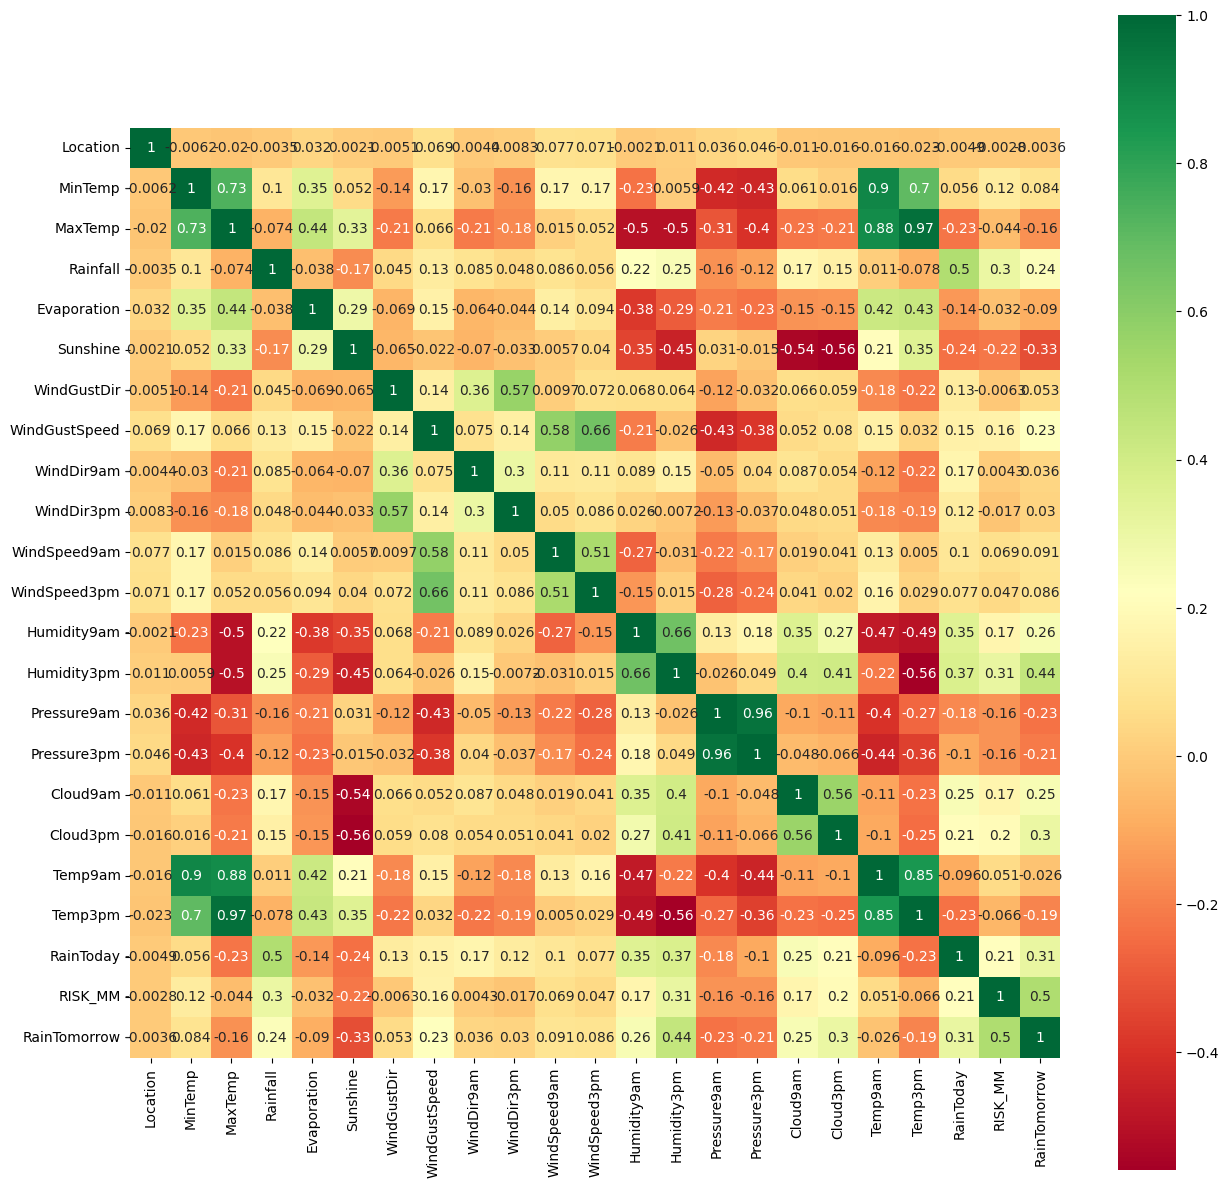

In [ ]:
## Correlación de las variables
plt.figure(figsize=(15,15))
p=sns.heatmap(data_frame.corr(), annot=True,cmap='RdYlGn',square=True)

Regresión Lineal:

Se utiliza prinncipalmente para las variables de carácter continuas.

¿Cómo varía la tasa de evaporación en relación con la temperatura mínima o máxima a las 3 p. m.?

En este algoritmo se estudia el comportamiento de la evaporación, a temperatura mínima o máxima a las 3pm.

Este modelo con las variables escogidas (Evaporation, MaxTemp, MinTemp, Temp3pm), nos ayuda a entender cómo varía la evaporación en relación con la temperatura máxima o mínima a las 3 p. m. es relevante para la gestión de recursos hídricos, especialmente en áreas donde la disponibilidad de agua es un factor limitante. Por ejemplo, en la agricultura, conocer la relación entre la evaporación y la temperatura a esta hora específica puede ayudar en la programación del riego y en la gestión eficiente del agua. Comprender cómo la evaporación responde a la temperatura a las 3 p. m. puede mejorar la precisión de estos modelos y, por lo tanto, mejorar nuestra capacidad para prever el clima futuro y sus impactos en el medio ambiente y la sociedad. Este algoritmo resultó en el más preciso de todos, ya que alcanzó un 0.94 de score, lo que significa que es el más confiable de todos a la hora de estudiar y analizar o buscar patrones o tendencias que nos indicará anomalías o respuestas claras ante alguna situación climática evidentemente preocupante.

Hipótesis 1:

El modelo de regresión lineal construido utilizando las variables 'Evaporation', 'MaxTemp' y 'MinTemp' es capaz de predecir la temperatura a las 3pm ('Temp3pm') con alta precisión en un conjunto hipotético de datos de prueba. Con un score mínimo de 0.87 con el que se espera para este análisis.

<ipython-input-13-1523041b95f1>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_frame[col], ax=ax[0], kde=False)


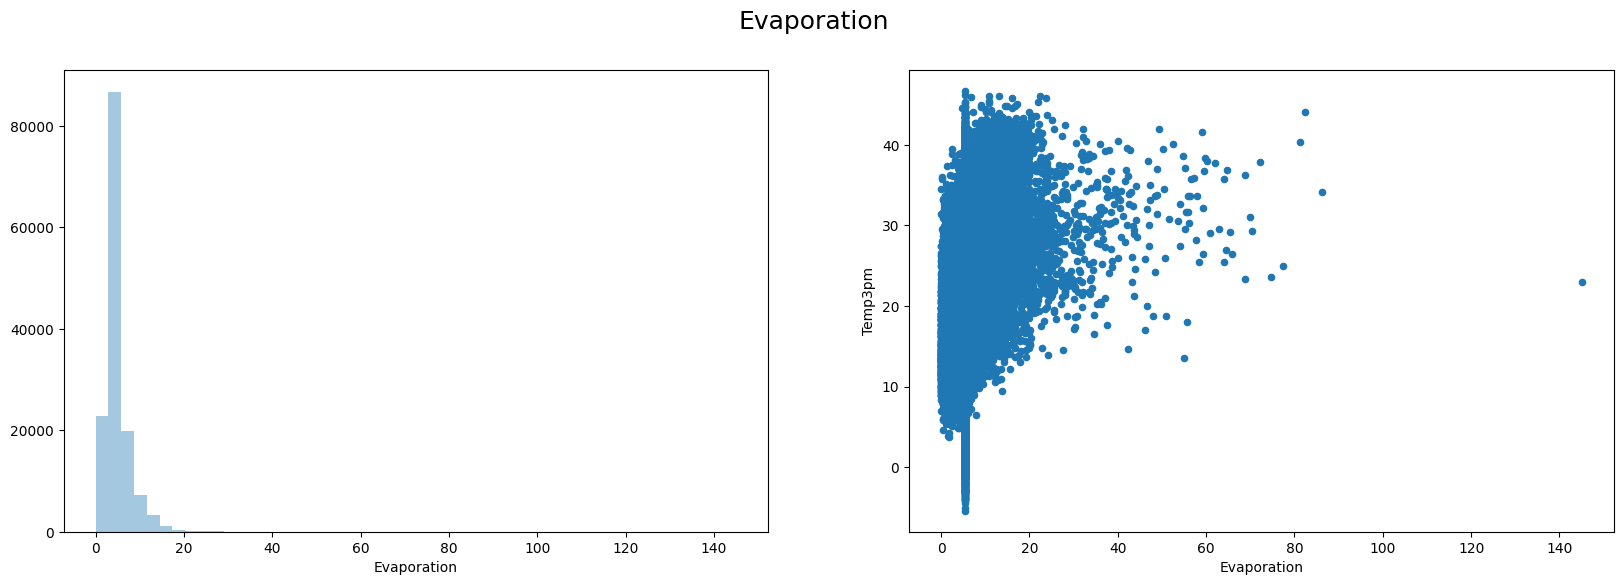

<ipython-input-13-1523041b95f1>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_frame[col], ax=ax[0], kde=False)


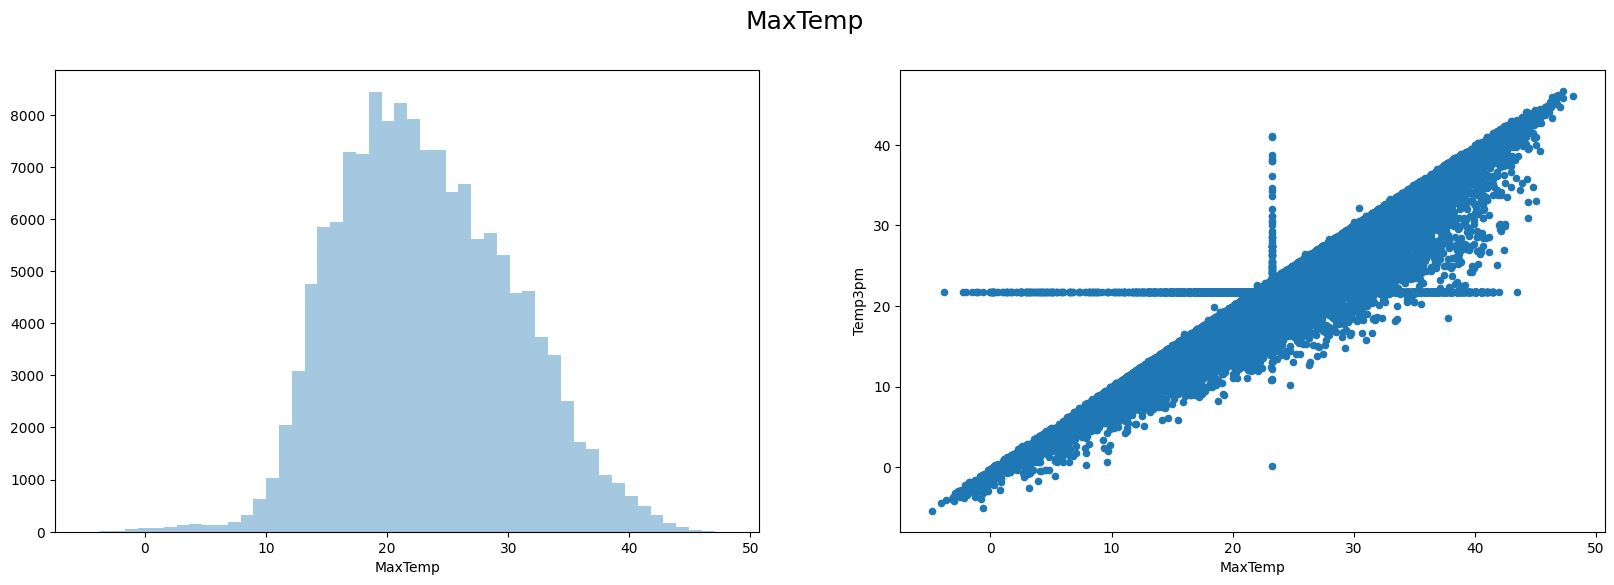

<ipython-input-13-1523041b95f1>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_frame[col], ax=ax[0], kde=False)


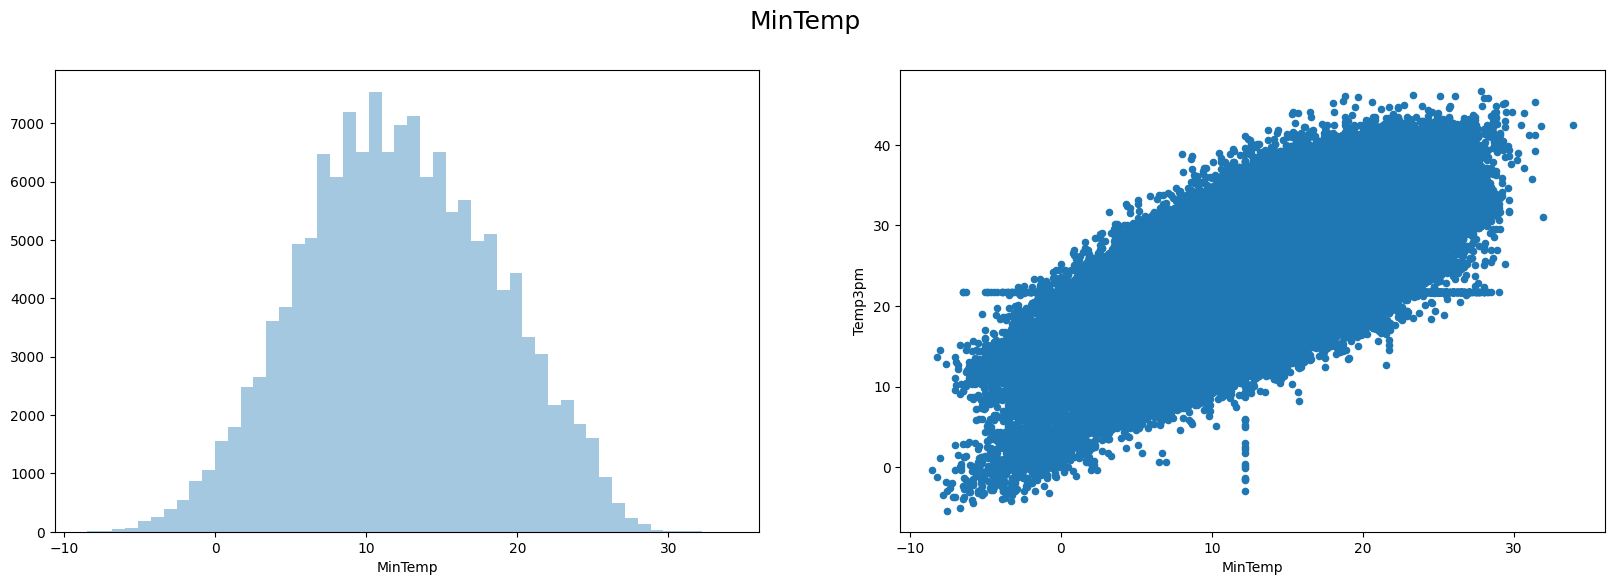

(142193, 23)

In [ ]:

for col in ['Evaporation', 'MaxTemp', 'MinTemp']:
  fig, ax =plt.subplots(1, 2, figsize=(20, 6))
  fig.suptitle(col, fontsize=18)
  sns.distplot(data_frame[col], ax=ax[0], kde=False)
  data_frame[[col]+['Temp3pm']].plot.scatter(x=col, y='Temp3pm', ax=ax[1])
  plt.show()
data_frame.shape

In [ ]:
data_frame = data_frame[(data_frame[['Evaporation', 'MaxTemp', 'MinTemp']] != 0).all(axis=1)]
data_frame.shape

(141783, 23)

In [ ]:
#Creando, validando y evaluando el modelo
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
#Se separan las varables predictoras y las que predicen
x = data_frame[['Evaporation', 'MaxTemp', 'MinTemp']] # Variables independientes
y = data_frame['Temp3pm'] # Variable dependiente

#Genera la muestra para entrenar y probar
X_train, X_test, y_train, y_test = train_test_split(x, y,test_size=0.2,random_state=29)
#Seleccionamos el modelo
modelo = LinearRegression()
#Entrena el modelo
modelo.fit(X_train, y_train)
#Validando el modelo
y_pred = modelo.predict(X_test)
#Evaluando el modelo
print("R2 :%.2f" % r2_score(y_test, y_pred))
print("MSE: %.2f" % mean_squared_error(y_pred, y_test))
print("Score del modelo : %.2f" % modelo.score(X_train, y_train))
#El modelo representa los datos en un 100%

R2 :0.94
MSE: 2.68
Score del modelo : 0.94


In [ ]:
#Realizando predicciones, le damos los valores de las variables independientes
print(modelo.predict(X_test))

[31.7171579  22.15149785 12.05725106 ... 19.47481047 19.62266945
 24.81423923]


In [ ]:
print(len(X_test))
print(len(y_test))

28357
28357


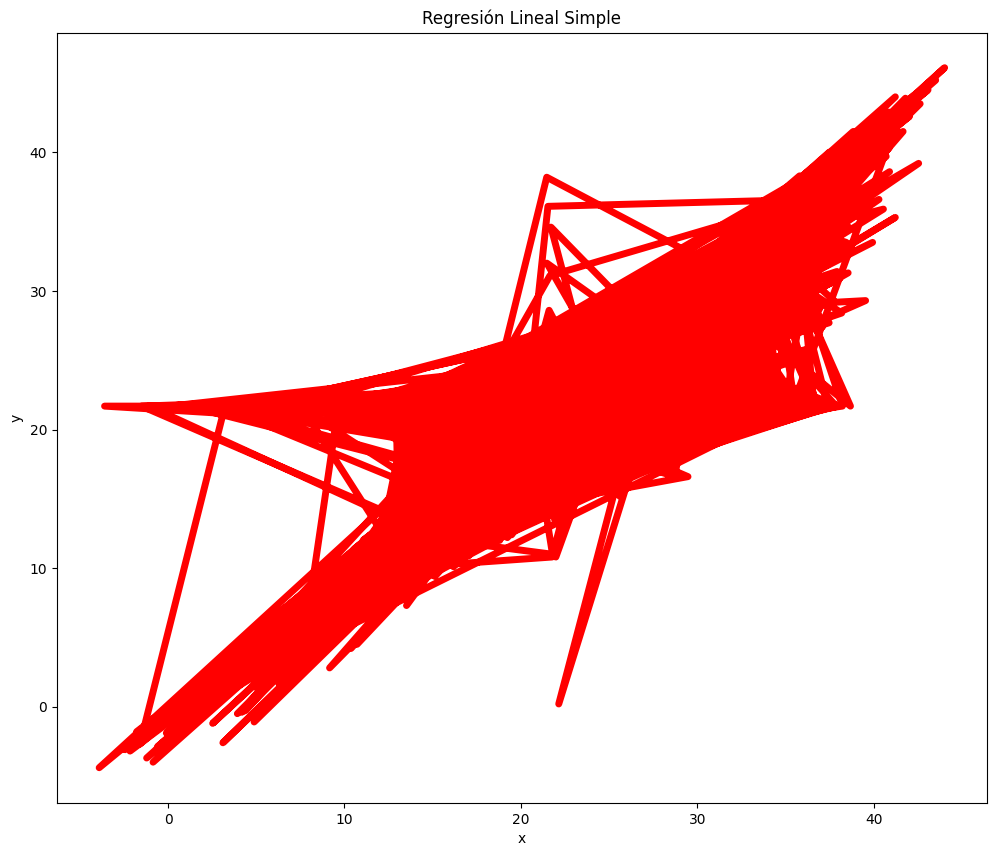

In [ ]:
plt.figure(figsize=(12,10))
plt.plot(y_pred, y_test, color="red", linewidth=5)
plt.title('Regresión Lineal Simple')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

Regresor 1:

¿Cómo varía la tasa de evaporación en relación con la temperatura mínima o máxima a las 3 p. m.?

Validaciones:

En la primer validación del modelo, observamos que nos da un MSE de un 2.33 lo que nos indica que es un resultado positivo en términos generales, con lo cual indica una excelente capacidad de predicción del modelo.

En cuánto a la validación del error absoluto medio nos dió un 0.98 lo que signifíca que tambíen presenta una buena prediccón del modelo.

Por último en la validación de R2_score, nos dió como resultado un 0.95, con lo que finalmente nos demuestra que el modelo tiene una capacidad de prección sólida y es excelente para la toma de decisiones.

In [ ]:
#dividir los datos en atributos y etiquetas
X = data_frame.drop('Temp3pm',axis=1)
y = data_frame['Temp3pm']
#la X variable contiene todas las columnas del conjunto de datos,
#excepto la columna «Class», que es la etiqueta.

In [ ]:
#dividir nuestros datos en conjuntos de prueba y entrenamiento.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

#el test_size parámetro especifica la proporción del conjunto de prueba,
#que usamos para dividir el 20% de los datos en el conjunto de prueba
#y el 80% para el entrenamiento.

In [ ]:
from sklearn.tree import DecisionTreeRegressor
modelo = DecisionTreeRegressor (max_depth = 5, random_state = 29)
modelo.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5, random_state=29)

In [ ]:
#Para hacer predicciones se utiliza el predict método de la clase DecisionTreeClassifier
y_pred = modelo.predict(X_test)
df=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
df

,Actual,Predicted
25728,23.8,22.745208
4420,28.9,29.745216
96864,26.5,24.823329
39224,28.1,29.745216
39791,22.5,22.745208
...,...,...
7047,32.2,32.727398
39892,16.7,16.758943
54920,8.8,8.791756
54981,8.8,8.791756


In [ ]:
print("Precisión del modelo :",modelo.score(X_train,y_train))
print("Precisión en validación :",modelo.score(X_test,y_test))


Precisión del modelo : 0.9520585581266707
Precisión en validación : 0.9501092420161381


In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred)

2.328865388022382

In [ ]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_pred)

0.9835945968636587

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.9501092420161381

Regresión Lineal 2.

Se utiliza principalmente para variables continuas.

¿Cómo varía la tasa de evaporación en relación con la temperatura mínima o máxima a las 9 a.m.?

En este algoritmo se estudia el comportamiento de la evaporación, a temperatura mínima o máxima a las 9am. Es un momento crítico durante la mañana en muchas regiones, especialmente en climas cálidos. A esta hora, la temperatura puede estar aumentando rápidamente después de la salida del sol, pero aún no ha alcanzado su punto máximo diario. Esto hace que sea un momento interesante para estudiar cómo la evaporación responde a la temperatura durante la fase inicial de calentamiento del día. A las 9 a.m., las condiciones pueden ser favorables para una alta tasa de evaporación. La temperatura puede estar en aumento, lo que aumenta la energía cinética de las moléculas de agua en la superficie y favorece la evaporación. Al mismo tiempo, es posible que la humedad relativa aún no sea muy alta, lo que también puede contribuir a una mayor evaporación. Este algoritmo nos dió como resultado un 0.91 de score, lo cual es muy bueno para las tendencias y con una excelente precisión en el comportamiento climático que nos propusimos estudiar en los kpis y objetivos propuestos.

Hipótesis 2:

El modelo de regresión lineal utilizando las variables independientes MinTemp, MaxTemp y Evaporation es capaz de predecir la temperatura a las 9am (Temp9am) con una precisión perfecta en los datos de prueba. Con lo que esperamos de que luego de realizar el modelo respectivo nos de mínimo un 0.9 de Score.

<ipython-input-27-5edb146f8bf6>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_frame[col], ax=ax[0], kde=False)


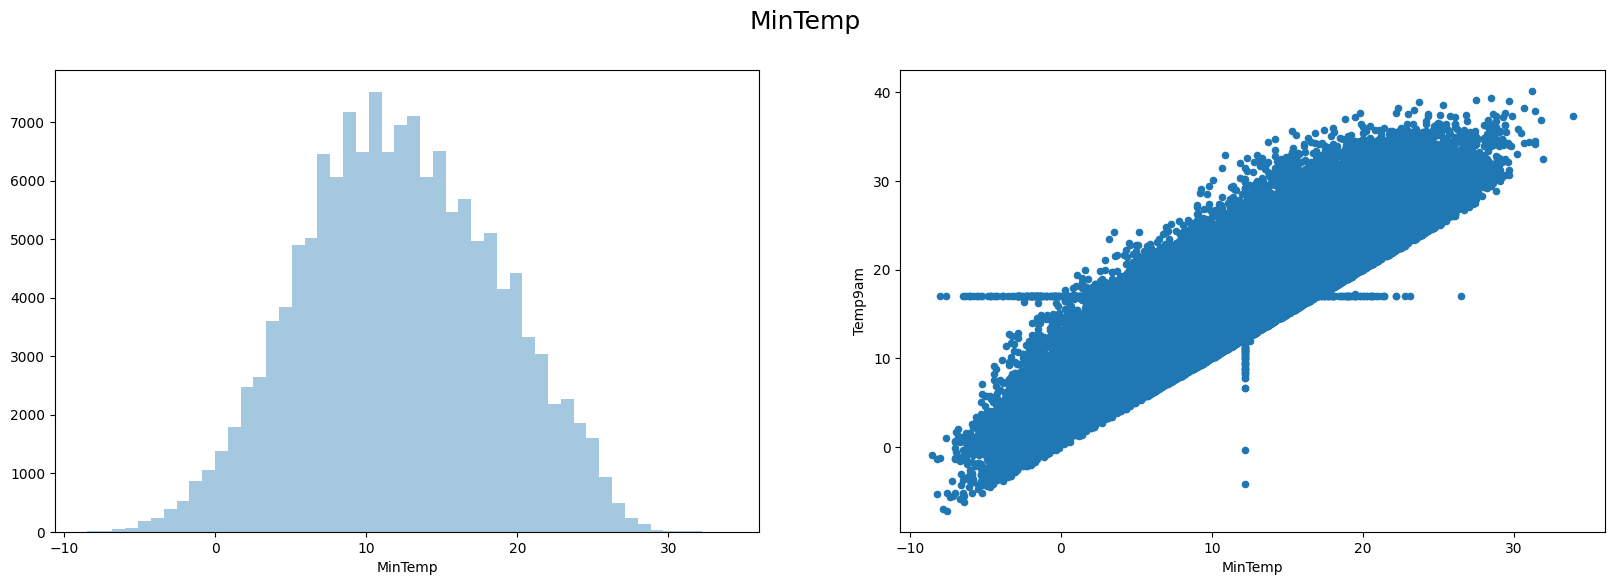

<ipython-input-27-5edb146f8bf6>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_frame[col], ax=ax[0], kde=False)


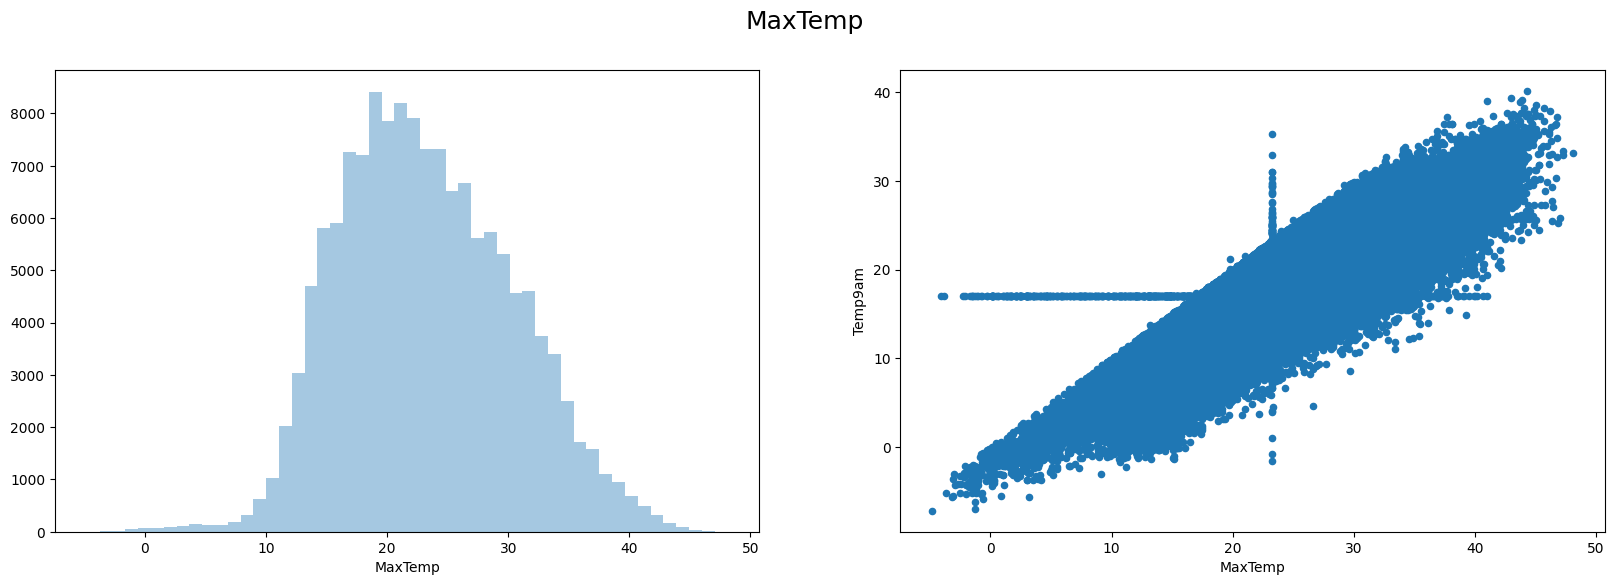

<ipython-input-27-5edb146f8bf6>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_frame[col], ax=ax[0], kde=False)


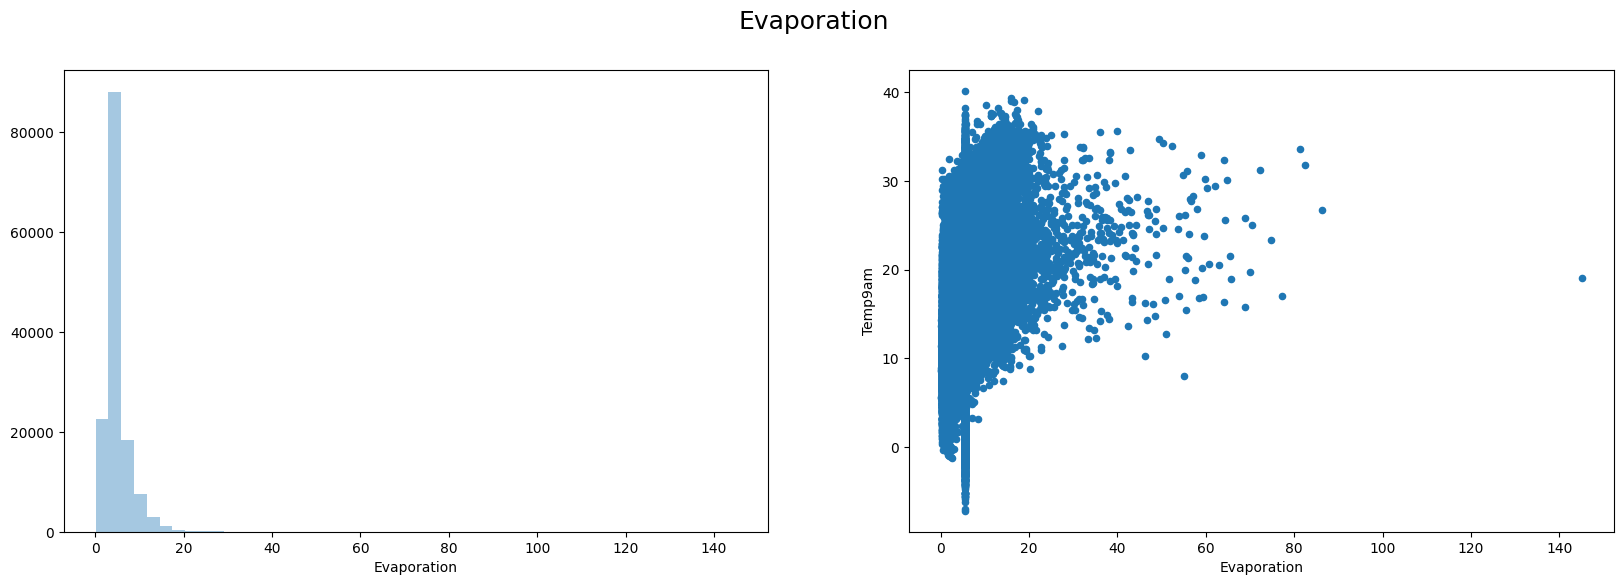

(141783, 23)

In [ ]:
#Con respecto a Global_Sales las variables con mayor correlacion son:NA_Sales,EU_Sales,JP_Sales,Other_Sales
for col in ['MinTemp', 'MaxTemp', 'Evaporation']:
  fig, ax =plt.subplots(1, 2, figsize=(20, 6))
  fig.suptitle(col, fontsize=18)
  sns.distplot(data_frame[col], ax=ax[0], kde=False)
  data_frame[[col]+['Temp9am']].plot.scatter(x=col, y='Temp9am', ax=ax[1])
  plt.show()
data_frame.shape

<ipython-input-28-5edb146f8bf6>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_frame[col], ax=ax[0], kde=False)


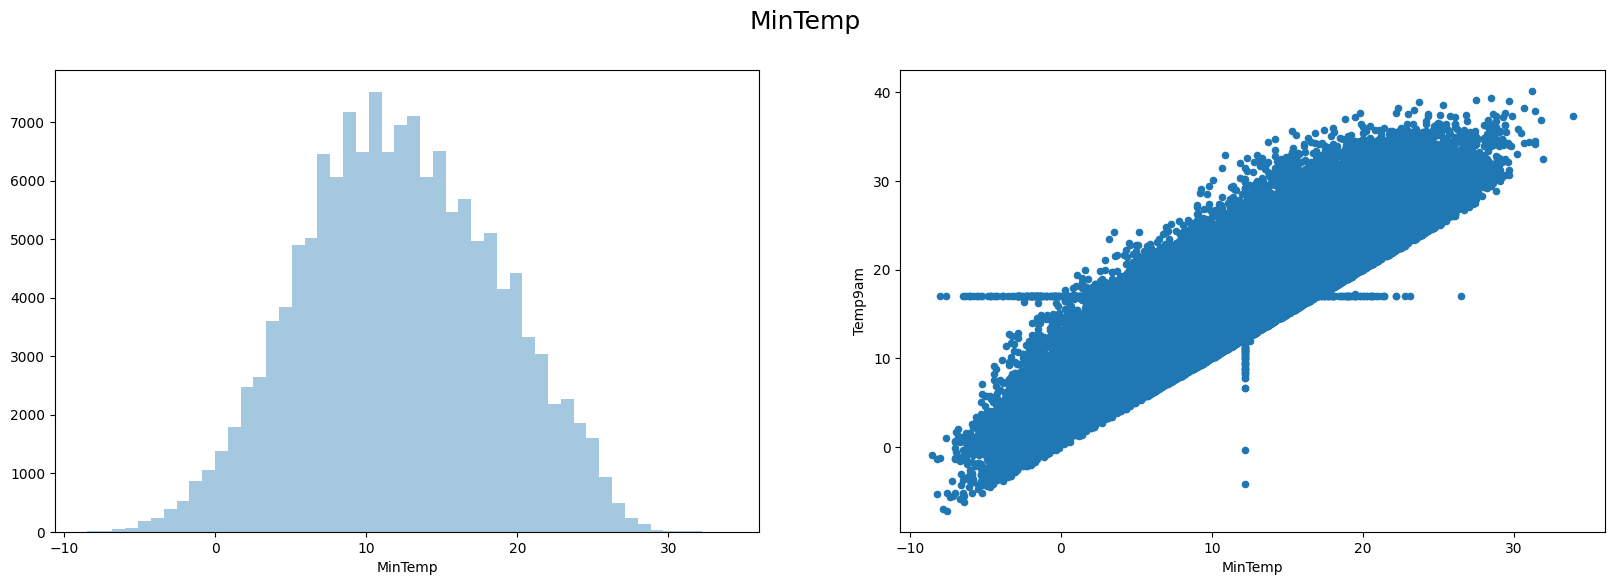

<ipython-input-28-5edb146f8bf6>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_frame[col], ax=ax[0], kde=False)


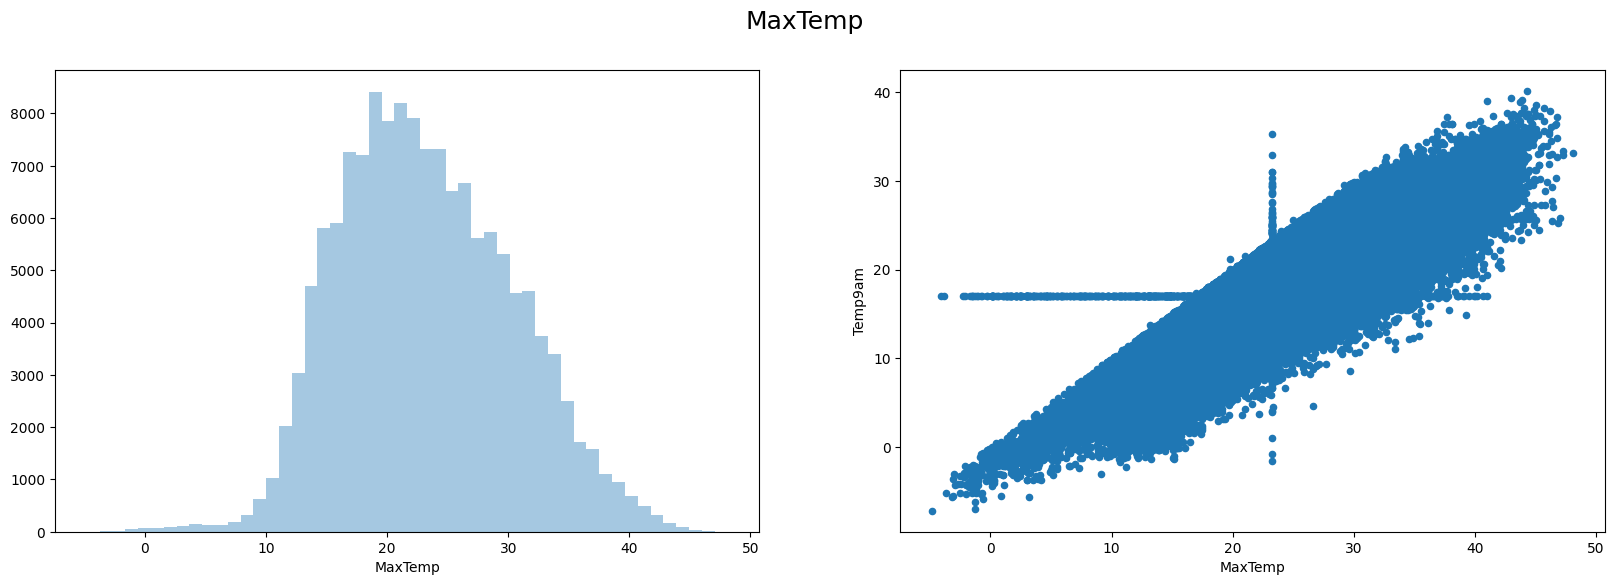

<ipython-input-28-5edb146f8bf6>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_frame[col], ax=ax[0], kde=False)


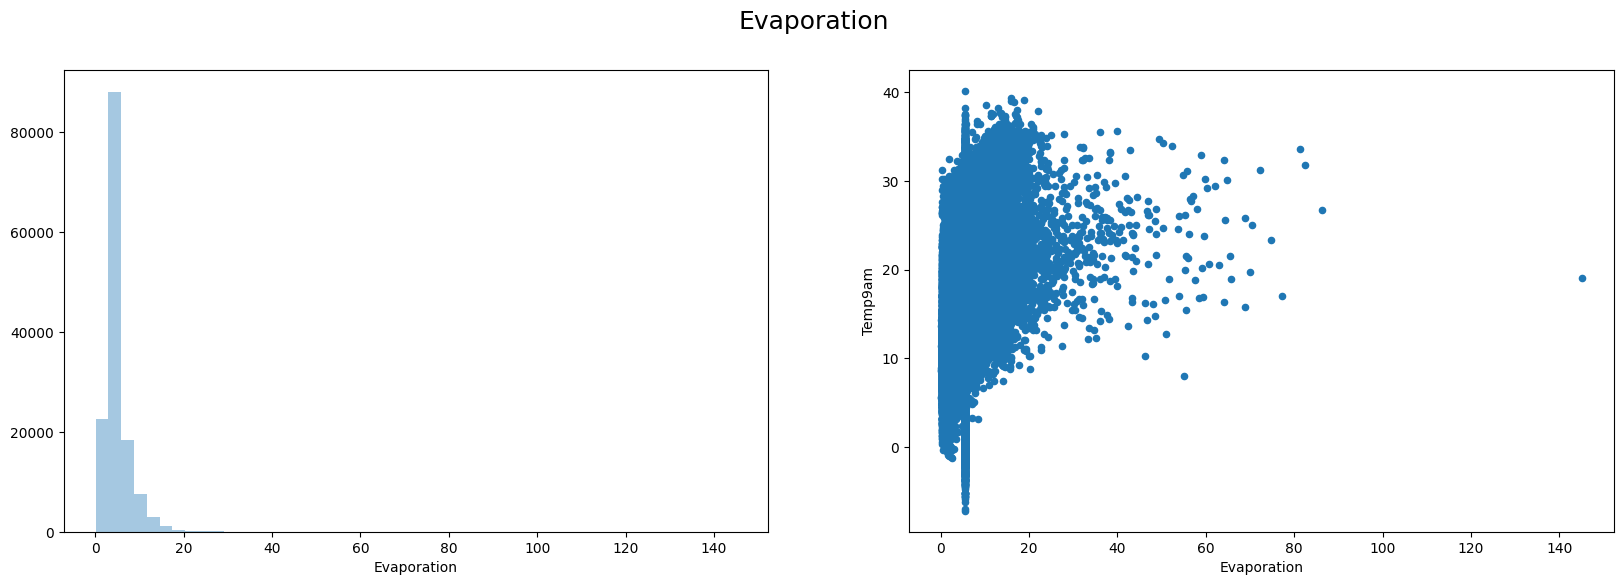

(141783, 23)

In [ ]:
#Con respecto a Global_Sales las variables con mayor correlacion son:NA_Sales,EU_Sales,JP_Sales,Other_Sales
for col in ['MinTemp', 'MaxTemp', 'Evaporation']:
  fig, ax =plt.subplots(1, 2, figsize=(20, 6))
  fig.suptitle(col, fontsize=18)
  sns.distplot(data_frame[col], ax=ax[0], kde=False)
  data_frame[[col]+['Temp9am']].plot.scatter(x=col, y='Temp9am', ax=ax[1])
  plt.show()
data_frame.shape

In [ ]:
data_frame = data_frame[(data_frame[['MinTemp', 'MaxTemp', 'Evaporation']] != 0).all(axis=1)]
data_frame.shape

(141783, 23)

In [ ]:
#Creando, validando y evaluando el modelo
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
#Se separan las varables predictoras y las que predicen
x = data_frame[['MinTemp', 'MaxTemp', 'Evaporation']] # Variables independientes
y = data_frame['Temp9am'] # Variable dependiente

#Genera la muestra para entrenar y probar
X_train, X_test, y_train, y_test = train_test_split(x, y,test_size=0.2,random_state=29)
#Seleccionamos el modelo
modelo = LinearRegression()
#Entrena el modelo
modelo.fit(X_train, y_train)
#Validando el modelo
y_pred = modelo.predict(X_test)
#Evaluando el modelo
print("R2 :%.2f" % r2_score(y_test, y_pred))
print("MSE: %.2f" % mean_squared_error(y_pred, y_test))
print("Score del modelo : %.2f" % modelo.score(X_train, y_train))
#El modelo representa los datos en un 100%

R2 :0.91
MSE: 3.68
Score del modelo : 0.91


In [ ]:
#Realizando predicciones, le damos los valores de las variables independientes
print(modelo.predict(X_test))

[25.06556493 14.99717442 11.49645536 ... 17.87259191 16.68892486
 16.42224785]


In [ ]:
print(len(X_test))
print(len(y_test))

28357
28357


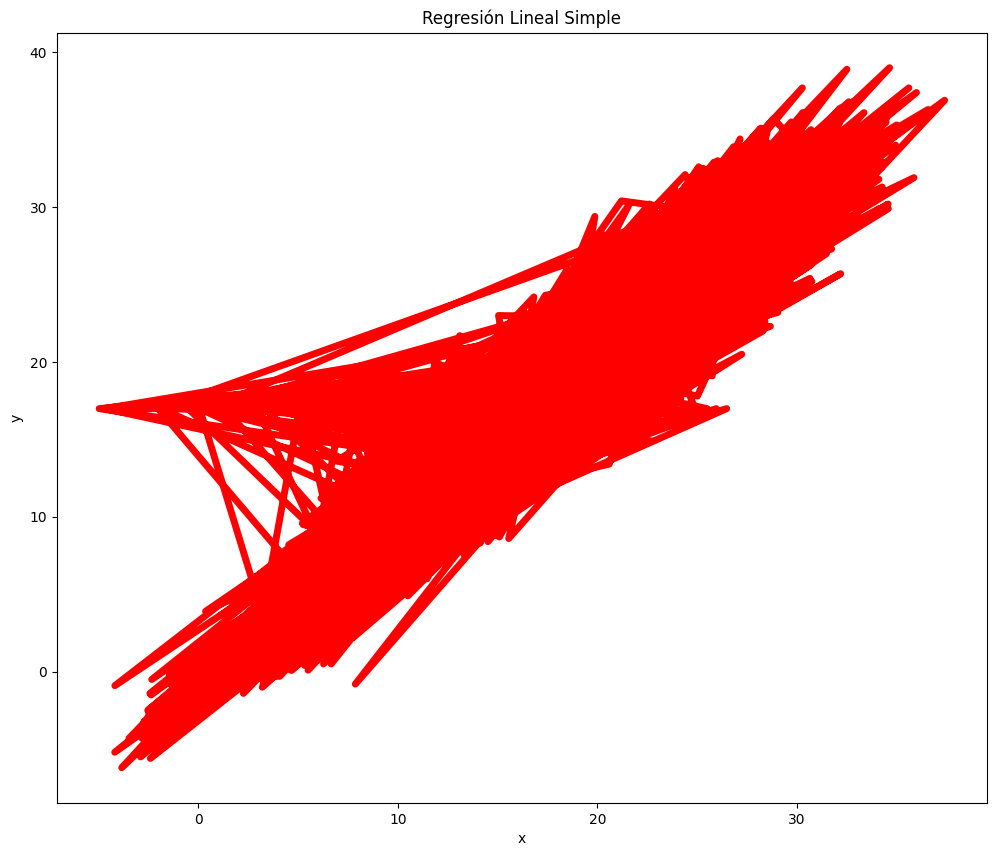

In [ ]:
plt.figure(figsize=(12,10))
plt.plot(y_pred, y_test, color="red", linewidth=5)
plt.title('Regresión Lineal Simple')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

Regresor 2:

¿Cómo varía la tasa de evaporación en relación con la temperatura mínima o máxima a las 9 a.m.?

En la primera validación del modelo del MSE, esta validación nos dió 4.21 lo que es un buen resultado, que mientras más cerca del 0 este en este tipo de métricas, es algo positivo para el modelo.

En el error absoluto medio, nos dió 1.58 lo que nos dice que tiene buenos parámetros y se acerca una predicción real que es lo que se solicita en estas validaciones.

Y por último en el R2_score nos arrojó un 0.90 con lo cual es un gran modelo para realizar predicciones y que tome decisiones certeras en un plan de estrategia.

In [ ]:
#dividir los datos en atributos y etiquetas
X = data_frame.drop('Temp9am',axis=1)
y = data_frame['Temp9am']
#la X variable contiene todas las columnas del conjunto de datos,
#excepto la columna «Class», que es la etiqueta.

In [ ]:
#dividir nuestros datos en conjuntos de prueba y entrenamiento.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

#el test_size parámetro especifica la proporción del conjunto de prueba,
#que usamos para dividir el 20% de los datos en el conjunto de prueba
#y el 80% para el entrenamiento.

In [ ]:
from sklearn.tree import DecisionTreeRegressor
modelo = DecisionTreeRegressor (max_depth = 5, random_state = 29)
modelo.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5, random_state=29)

In [ ]:
#Para hacer predicciones se utiliza el predict método de la clase DecisionTreeClassifier
y_pred = modelo.predict(X_test)
df=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
df

,Actual,Predicted
22558,15.5,13.769427
105668,8.7,7.167743
4817,16.6,17.637265
55152,14.4,16.341574
62285,13.7,13.769427
...,...,...
30475,17.7,18.242747
123253,18.3,19.872826
84751,25.8,26.098347
57228,8.1,9.438347


In [ ]:
print("Precisión del modelo :",modelo.score(X_train,y_train))
print("Precisión en validación :",modelo.score(X_test,y_test))

Precisión del modelo : 0.9007510203663793
Precisión en validación : 0.900179099948543


In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred)

4.212128614206304

In [ ]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_pred)

1.583129923999207

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.900179099948543

Random Forest:

Random Forest puede utilizarse tanto para problemas de clasificación como de regresión. En clasificación, puede predecir la clase o categoría a la que pertenece un dato, mientras que en regresión puede predecir un valor numérico.

¿Cuál es la probabilidad de que llueva o no mañana?.

En este algoritmo se estudia la información recopilada por radares meteorológicos o satélites puede proporcionar datos en tiempo real, sobre la formación y movimiento de sistemas meteorológicos que podrían llevar a la lluvia. Entender la probabilidad de que llueva o no mañana es importante para la gestión de riesgos asociados con eventos climáticos extremos, como inundaciones o sequías. Esta información puede ayudar a tomar medidas preventivas o de mitigación para reducir el impacto de tales eventos en la infraestructura, la agricultura y la seguridad pública. Estudiar los patrones de precipitación y su probabilidad contribuye a una mejor comprensión del sistema climático y sus interacciones con otros factores ambientales. Este algoritmo nos dió 0.87 lo cual es confiable para el análsis de la lluvia, es decir, cumple con los estándares de precisión que se solicita, pero de los dos algoritmos de random forest rescatados este es el con menor precisión, y el que menos precisión tiene de todos los algoritmos analizados.

Hipótesis1 de Evaluación del Modelo:

El modelo de random forest basado en variables meteorológicas como temperatura, humedad, velocidad del viento y presión atmosférica será capaz de predecir con una precisión superior al 85% si lloverá mañana ('raintomorrow'). Se espera que la matriz de confusión muestre una alta concordancia entre las predicciones del modelo y los eventos reales de lluvia, validando así su utilidad en la predicción meteorológica diaria.

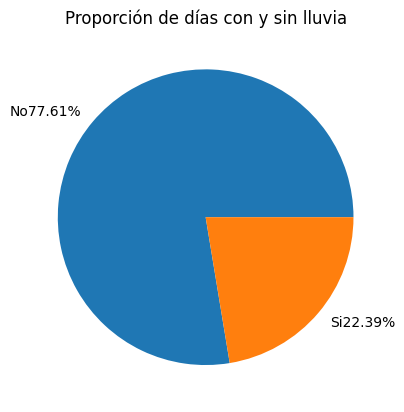

In [ ]:
# Gráfico de torta del porcentaje de Clientes de Fibra optica, DSL y sin servicio de Internet
#clases = np.array([data_frame[data_frame.relationship == 0.0].shape[0],data_frame[data_frame.relationship == 1.0].shape[0],data_frame[data_frame.relationship == 2.0].shape[0],data_frame[data_frame.relationship == 3.0].shape[0],data_frame[data_frame.relationship == 4.0].shape[0],data_frame[data_frame.relationship == 5.0].shape[0]])
clases = np.array([data_frame[data_frame.RainTomorrow == 0.0].shape[0],data_frame[data_frame.RainTomorrow == 1.0].shape[0]])
# Creando las leyendas del grafico.
labels = [ str(round(x * 1.0 / clases.sum() * 100.0, 2)) + '%' for x in clases]
labels[0] = 'No' + labels[0]
labels[1] = 'Si' + labels[1]
#labels[2] = 'Other-relative ' + labels[2]
#labels[3] = 'Own-child ' + labels[3]
#labels[4] = 'Unmarried ' + labels[4]
#labels[5] = 'Wife ' + labels[5]
plt.pie(clases, labels=labels)
plt.title('Proporción de días con y sin lluvia')
plt.show()

In [ ]:
#Seleccionando las mejores variables
from sklearn.feature_selection import SelectKBest
X=data_frame.drop(['RainTomorrow'], axis=1)
y=data_frame['RainTomorrow']
best=SelectKBest(k=5)
X_new = best.fit_transform(X, y)
X_new.shape
selected = best.get_support(indices=True)
print(X.columns[selected])

Index(['Sunshine', 'Humidity3pm', 'Cloud3pm', 'RainToday', 'RISK_MM'], dtype='object')


<Axes: title={'center': 'Pearson Correlation of Features'}>

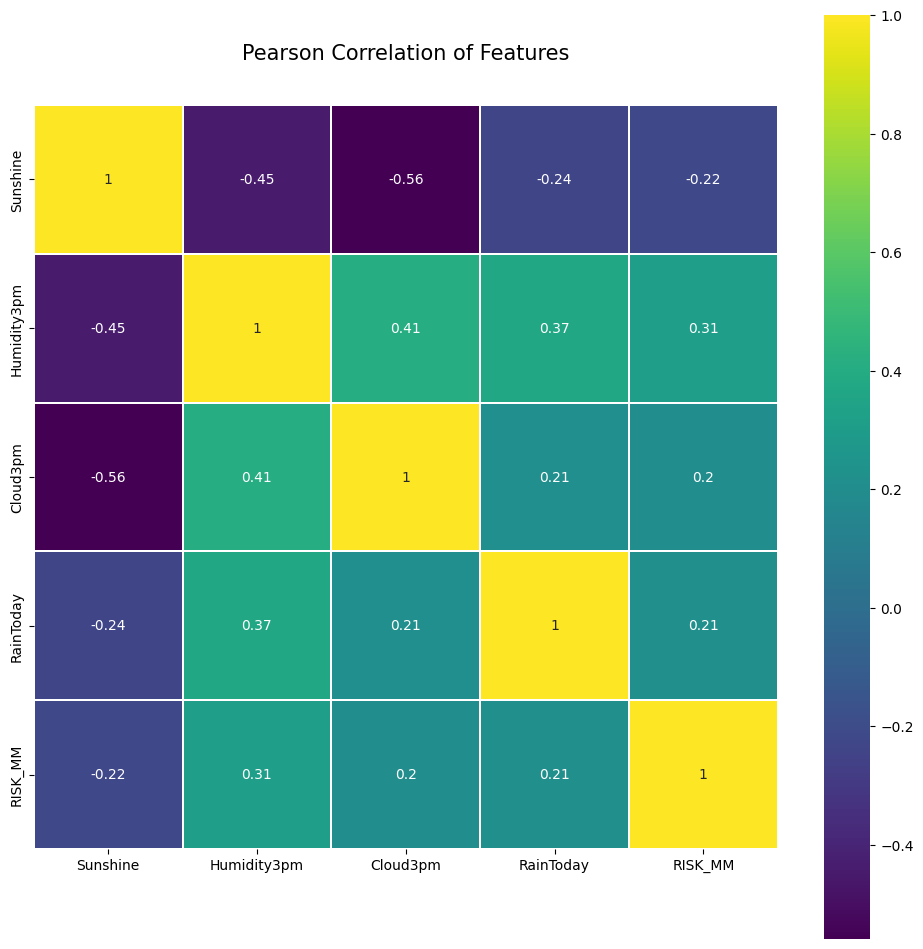

In [ ]:
import seaborn as sb
used_features =X.columns[selected]
colormap = plt.cm.viridis
plt.figure(figsize=(12,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sb.heatmap(data_frame[used_features].astype(float).corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)

In [ ]:
X = data_frame[used_features]
# Se separan los datos de "train" en entrenamiento y prueba para probar los algoritmos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state = 29)
modelo_x = GaussianNB()
# Entrenamiento del modelo
modelo_x.fit(X_train, y_train)
# Validación del modelo
y_pred = modelo_x.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix, precision_score

In [ ]:
# Evaluación del modelo
matriz_x = confusion_matrix(y_test, y_pred)
print('Matriz de Confusión:')
print(matriz_x)
precision = precision_score(y_test, y_pred)
print('Precisión del modelo:')
print(precision)

Matriz de Confusión:
[[21115   936]
 [    0  6306]]
Precisión del modelo:
0.8707539353769677


Clasificador 1:

¿Cuál es la probabilidad de que llueva o no mañana?.

F1-score: El F1-score es la media armónica de precision y recall. Al ser 1.00 para ambas clases, indica un equilibrio entre precision y recall, y sugiere un buen rendimiento general del modelo en términos de precisión y exhaustividad.

Al realizar la validación con el clasificador para este modelo, nos dió un accuracy del 100%, lo cual significa que todas las predicciones realizadas por el modelo son correctas en relación con el total de muestras.

En términos prácticos, esto sugiere que el modelo fue capaz de clasificar todas las muestras de manera perfecta según las clases predichas.

Matriz de confusión:

Verdaderos positivos (TP): Son los casos en los que el modelo predijo correctamente que las muestras pertenecen a la clase positiva (en este caso, parece ser 6306 casos).

Falsos positivos (FP): Son los casos en los que el modelo predijo incorrectamente que las muestras pertenecen a la clase positiva cuando en realidad pertenecen a la clase negativa (936 casos).

Verdaderos negativos (TN): Son los casos en los que el modelo predijo correctamente que las muestras pertenecen a la clase negativa (21115 casos).

Falsos negativos (FN): Son los casos en los que el modelo predijo incorrectamente que las muestras pertenecen a la clase negativa cuando en realidad pertenecen a la clase positiva (0 casos en este caso, lo cual indica un buen rendimiento en este aspecto).

Nos muestra un buen rendimiento en términos de precisión general, las predicciones que realizó el modelo fueron las correctas.

In [ ]:
#dividir los datos en atributos y etiquetas
X = data_frame.drop('RainTomorrow',  axis=1)
y = data_frame['RainTomorrow']
#la X variable contiene todas las columnas del conjunto de datos,
#excepto la columna «Class», que es la etiqueta.

In [ ]:
#dividir nuestros datos en conjuntos de prueba y entrenamiento.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

#el test_size parámetro especifica la proporción del conjunto de prueba,
#que usamos para dividir el 20% de los datos en el conjunto de prueba
#y el 80% para el entrenamiento.

In [ ]:
from sklearn.tree import DecisionTreeClassifier
modelo = DecisionTreeClassifier (max_depth = 5, random_state = 29)
modelo.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=29)

In [ ]:
#Para hacer predicciones se utiliza el predict método de la clase DecisionTreeClassifier
y_pred = modelo.predict(X_test)
df=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
df

,Actual,Predicted
133336,0,0
5371,0,0
131897,0,0
19360,0,0
93943,0,0
...,...,...
43193,0,0
32972,1,1
120358,0,0
121093,0,0


In [ ]:
print("Precisión del modelo :",modelo.score(X_train,y_train))
print("Precisión en validación :",modelo.score(X_test,y_test))
#Esto es un 98,35% de precisión. ¡No está mal!

Precisión del modelo : 1.0
Precisión en validación : 1.0


In [ ]:
# confisuon matrix
from sklearn.metrics import confusion_matrix
cm_knn = confusion_matrix(y_test,y_pred)

In [ ]:
from sklearn.metrics import classification_report
report_dt = classification_report(y_test, y_pred)

In [ ]:
print("\nDecision Tree Classifier Classification Report:")
print(report_dt)


Decision Tree Classifier Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     21993
           1       1.00      1.00      1.00      6364

    accuracy                           1.00     28357
   macro avg       1.00      1.00      1.00     28357
weighted avg       1.00      1.00      1.00     28357



Random Forest 2:

Random Forest puede utilizarse tanto para problemas de clasificación como de regresión. En clasificación, puede predecir la clase o categoría a la que pertenece un dato, mientras que en regresión puede predecir un valor numérico.

¿Cuál es la probabilidad de que llueva o no hoy?.

El objetivo de estudiar este problema con un algoritmo como Random Forest sería proporcionar una herramienta para predecir la probabilidad de lluvia en función de las condiciones climáticas actuales. Esto podría tener varias aplicaciones, como ayudar a las personas a planificar sus actividades diarias, ayudar a las empresas a tomar decisiones relacionadas con el clima, o incluso ayudar a los servicios meteorológicos a mejorar sus pronósticos. Esta información es valiosa para el público en general, así como para sectores específicos que dependen del clima, como la aviación, la navegación marítima y la generación de energía. Este algoritmo resultómun poco más confiable que el de RainTomorrow porque la precisión del algoritmo resultó mejor que el que señalé anteriormente, este tiene un score de 0.92 lo que es muvho mejor para el análisis del algoritmo en si.

Hipótesis2 de Evaluación del Modelo para 'raintoday':

Se espera que el modelo de random forest, basado en variables meteorológicas como humedad, temperatura, velocidad del viento y presión atmosférica, logre una precisión superior al 85% en la predicción de si lloverá hoy ('raintoday'). La matriz de confusión y la métrica de precisión validarán la capacidad del modelo para prever adecuadamente las condiciones de lluvia diarias.

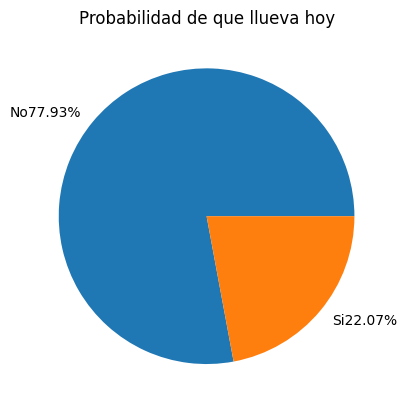

In [ ]:
# Gráfico de torta del porcentaje de Clientes de Fibra optica, DSL y sin servicio de Internet

clases = np.array([data_frame[data_frame.RainToday == 0.0].shape[0],data_frame[data_frame.RainToday == 1.0].shape[0]])
# Creando las leyendas del grafico.
labels = [ str(round(x * 1.0 / clases.sum() * 100.0, 2)) + '%' for x in clases]
labels[0] = 'No' + labels[0]
labels[1] = 'Si' + labels[1]
plt.pie(clases, labels=labels)
plt.title('Probabilidad de que llueva hoy')
plt.show()

In [ ]:
#Seleccionando las mejores variables
from sklearn.feature_selection import SelectKBest
X=data_frame.drop(['RainToday'], axis=1)
y=data_frame['RainToday']
best=SelectKBest(k=5)
X_new = best.fit_transform(X, y)
X_new.shape
selected = best.get_support(indices=True)
print(X.columns[selected])

Index(['Rainfall', 'Humidity9am', 'Humidity3pm', 'Cloud9am', 'RainTomorrow'], dtype='object')


<Axes: title={'center': 'Pearson Correlation of Features'}>

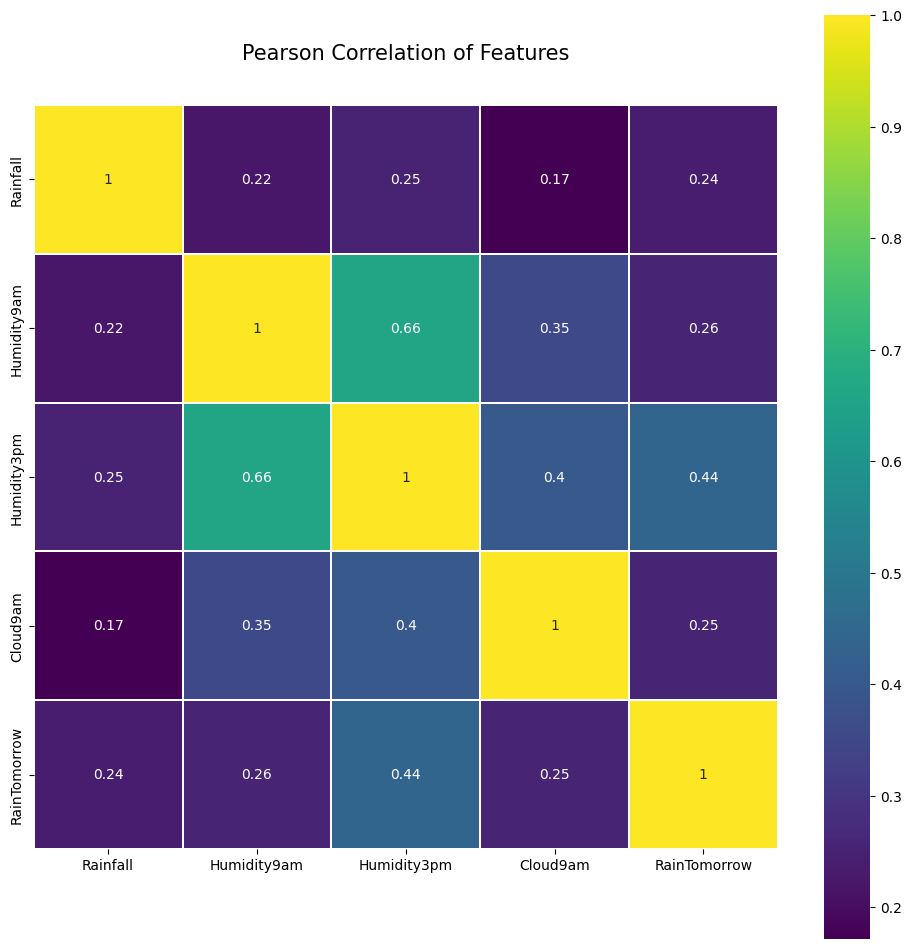

In [ ]:
import seaborn as sb
used_features =X.columns[selected]
colormap = plt.cm.viridis
plt.figure(figsize=(12,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sb.heatmap(data_frame[used_features].astype(float).corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)

In [ ]:
X = data_frame[used_features]
# Se separan los datos de "train" en entrenamiento y prueba para probar los algoritmos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state = 29)
modelo_x = GaussianNB()
# Entrenamiento del modelo
modelo_x.fit(X_train, y_train)
# Validación del modelo
y_pred = modelo_x.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix, precision_score

In [ ]:
# Evaluación del modelo
matriz_x = confusion_matrix(y_test, y_pred)
print('Matriz de Confusión:')
print(matriz_x)
precision = precision_score(y_test, y_pred)
print('Precisión del modelo:')
print(precision)

Matriz de Confusión:
[[21446   533]
 [  115  6263]]
Precisión del modelo:
0.9215715126545027


Clasificador 2:

¿Cuál es la probabilidad de que llueva o no hoy?.

F1-score: El F1-score es la media armónica de precision y recall. Al ser 1.00 para ambas clases, indica un equilibrio entre precision y recall, y sugiere un buen rendimiento general del modelo en términos de precisión y exhaustividad.

Al realizar la validación con el clasificador para este modelo, nos dió un accuracy del 100%, lo cual significa que todas las predicciones realizadas por el modelo son correctas en relación con el total de muestras.

En términos prácticos, esto sugiere que el modelo fue capaz de clasificar todas las muestras de manera perfecta según las clases predichas.

Matriz de confusión:

Verdaderos positivos (TP): Son los casos en los que el modelo predijo correctamente que las muestras pertenecen a la clase positiva (6263 casos).

Falsos positivos (FP): Son los casos en los que el modelo predijo incorrectamente que las muestras pertenecen a la clase positiva cuando en realidad pertenecen a la clase negativa (533 casos).

Verdaderos negativos (TN): Son los casos en los que el modelo predijo correctamente que las muestras pertenecen a la clase negativa (21446 casos).

Falsos negativos (FN): Son los casos en los que el modelo predijo incorrectamente que las muestras pertenecen a la clase negativa cuando en realidad pertenecen a la clase positiva (115 casos).

la precisión del 92.16% y la matriz de confusión indican que en el modelo tiene un buen rendimiento en la clasificación de las muestras evaluadas.

In [ ]:
#dividir los datos en atributos y etiquetas
X = data_frame.drop('RainToday',axis=1)
y = data_frame['RainToday']
#la X variable contiene todas las columnas del conjunto de datos,
#excepto la columna «Class», que es la etiqueta.

In [ ]:
#dividir nuestros datos en conjuntos de prueba y entrenamiento.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

#el test_size parámetro especifica la proporción del conjunto de prueba,
#que usamos para dividir el 20% de los datos en el conjunto de prueba
#y el 80% para el entrenamiento.

In [ ]:
from sklearn.tree import DecisionTreeClassifier
modelo = DecisionTreeClassifier (max_depth = 5, random_state = 29)
modelo.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=29)

In [ ]:
#Para hacer predicciones se utiliza el predict método de la clase DecisionTreeClassifier
y_pred = modelo.predict(X_test)
df=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
df

,Actual,Predicted
92225,0,0
131649,0,0
103425,0,0
93906,0,0
80003,1,1
...,...,...
125125,0,0
93547,0,0
48667,0,0
9290,1,1


In [ ]:
print("Precisión del modelo :",modelo.score(X_train,y_train))
print("Precisión en validación :",modelo.score(X_test,y_test))
#Esto es un 98,35% de precisión. ¡No está mal!

Precisión del modelo : 1.0
Precisión en validación : 1.0


In [ ]:
# confisuon matrix
from sklearn.metrics import confusion_matrix
cm_knn = confusion_matrix(y_test,y_pred)

In [ ]:
from sklearn.metrics import classification_report
report_dt = classification_report(y_test, y_pred)

In [ ]:
print("\nDecision Tree Classifier Classification Report:")
print(report_dt)


Decision Tree Classifier Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     22131
           1       1.00      1.00      1.00      6226

    accuracy                           1.00     28357
   macro avg       1.00      1.00      1.00     28357
weighted avg       1.00      1.00      1.00     28357



Shilluete: Por Kmeans

En este caso, se obtuvo obtenido un SSE de 1.5 para 8 clusters. Esto significa que, con 8 clusters, el SSE es relativamente bajo, lo cual es una buena señal de que los clusters están bien definidos y compactos en términos de distancia a sus centroides.

In [ ]:
data_frame1 = data_frame.head(3000)

In [ ]:
!pip install kneed            # instalamos el paquete con pip
from kneed import KneeLocator # importamos el paquete para detectar el codo

In [ ]:
from sklearn.cluster import KMeans, AffinityPropagation
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# esto puede demorar un par de minutos

sse = [] # acá vamos a guardar el puntaje de la función objetivo

for k in range(1, 40):
  print(k)
  kkmeans = KMeans(n_clusters=k)
  kkmeans.fit(data_frame1)
  sse.append(kkmeans.inertia_)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39


Text(0, 0.5, 'SSE')

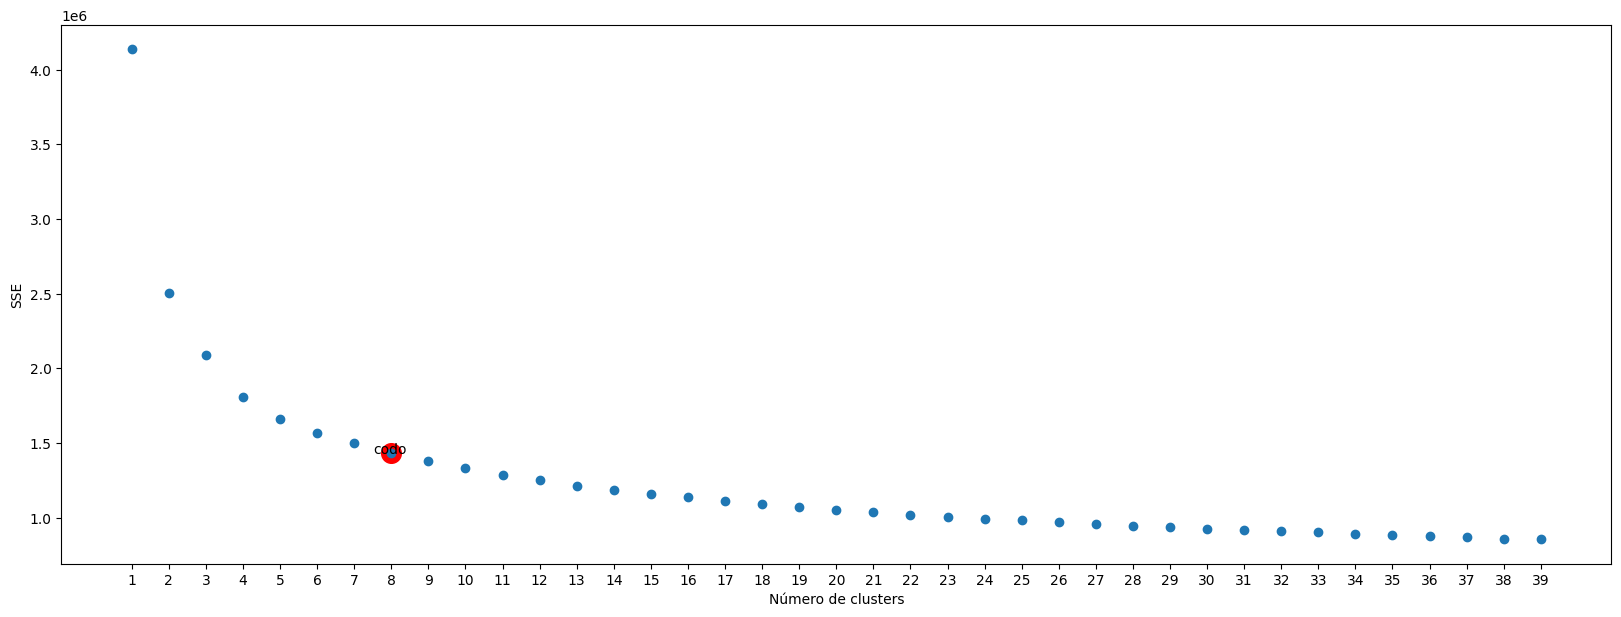

In [ ]:
fig, ax = plt.subplots(figsize = (20, 7))

# esta dos lineas las agrego para que se vea la elección de KneeLocator para el codo en este gráfico
ax.scatter(8, sse[7], color='red', s=200) # agregamos un punto rojo al plot de tamaño s=200 en el lugar donde se encuentra el codo
ax.text(7.5, sse[7]-1000, s="codo")       # agregamos un texto abajo para indicar qué representa el punto

# estas lineas son el grafico de SSEvsK
ax.scatter(range(1, 40), sse)
ax.set_xticks(range(1, 40))
ax.set_xlabel("Número de clusters")
ax.set_ylabel("SSE")

In [ ]:
kl = KneeLocator(range(1, 40), sse, curve="convex", direction="decreasing")

print("El codo está en k =", kl.elbow)

El codo está en k = 6


Shilluertte: Clustering Jerarquico

In [ ]:
# importamos el puntaje de silhouette
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering # Importo el método de clustering jerárquico (bottom-up)
cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward') # Creamos el modelo

In [ ]:
# Creamos una lista para guardar de los coeficientes de silhouette para cada valor de k
silhouette_coefficients = []

# Se necesita tener al menos 2 clusters y a los sumo N-1 (con N el numero de muestras) para obtener coeficientes de Silohuette
for k in range(2, 20):
     cluster = AgglomerativeClustering(n_clusters=k, affinity='euclidean', linkage='ward')
     cluster.fit(data_frame1)
     score = silhouette_score(data_frame1, cluster.labels_)
     silhouette_coefficients.append(score)

Text(0, 0.5, 'Promedio coeficientes de Silhouette')

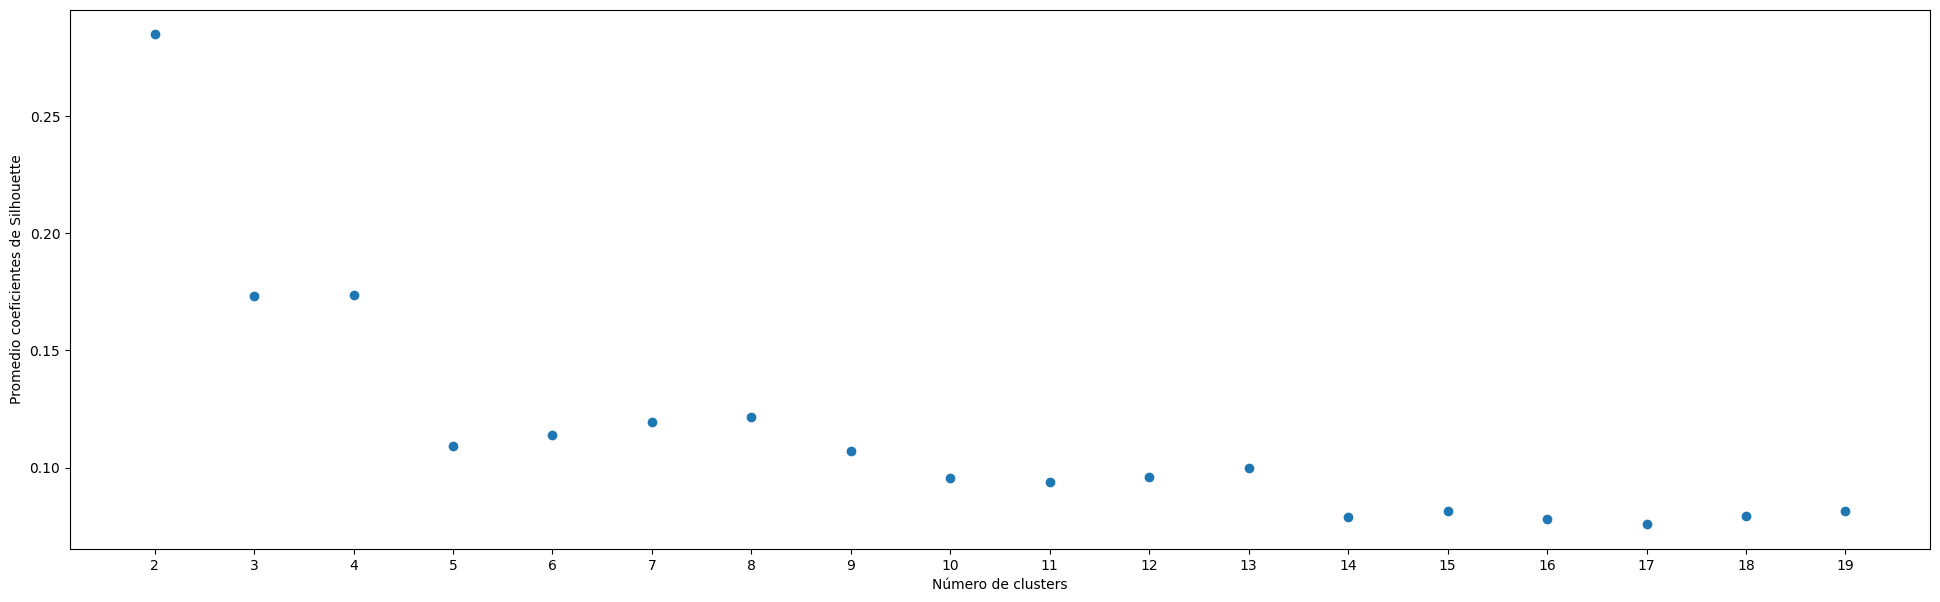

In [ ]:
fig, ax = plt.subplots(figsize = (24, 7))

# estas lineas son el grafico de SSE vs K
ax.scatter(range(2, 20), silhouette_coefficients)
ax.set_xticks(range(2, 20))
ax.set_xlabel("Número de clusters")
ax.set_ylabel("Promedio coeficientes de Silhouette")

Podemos decir que elalgoritmo de kmeans presenta un mejor coeficiente de shilluette, porque presenta un mejor promedio de coeficientes de shillhouette y mayor número de clusters.